<a href="https://colab.research.google.com/github/SaadARazzaq/ML-Q2-golf/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

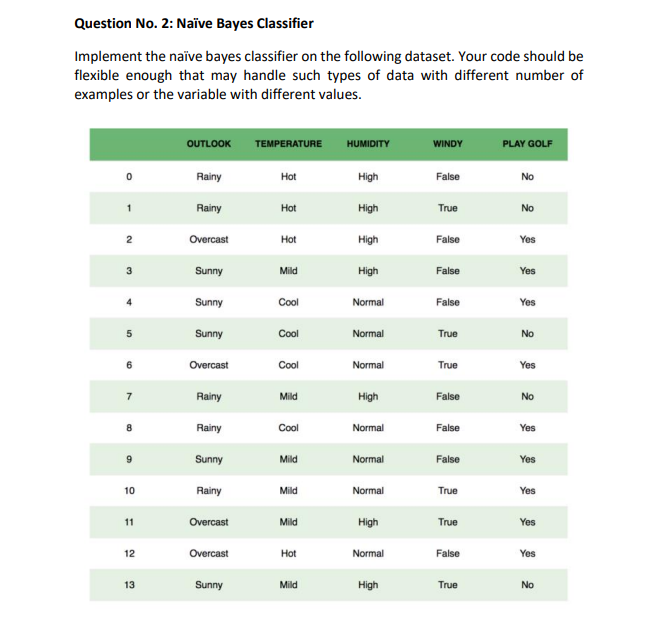

Dataset Used: https://www.kaggle.com/datasets/saadabdurrazzaq/play-golf-dataset

In [22]:
import numpy as np
import pandas as pd

In [23]:
df = pd.read_csv("play_golf.csv")

In [24]:
df.head(14)

,OUTLOOK,TEMPERATURE,HUMIDITY,WINDY,PLAY GOLF
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
5,Sunny,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Rainy,Mild,High,False,No
8,Rainy,Cool,Normal,False,Yes
9,Sunny,Mild,Normal,False,Yes


In [25]:
len(df)

14

### **Intuition:**

### We have to find out the below probabilities:


*   P(Yes | Sunny,Hot,High,Weak)=P(Sunny | Yes) * P(Hot | Yes) * P(High | Yes) * P(Weak | Yes) * P(Yes)
*   P(No | Sunny,Hot,High,Weak)=P(Sunny | No) * P(Hot | No) * P(High | No) * P(Weak | No) * P(No)

### Compare the results of both the probabilities and choose the one which is the **Highest**. This is called the ***Maximum a poteriori rule.***

---

## **Training:**

In [26]:
# For training, then Naiive Bayes creates a Lookup table(Dictionary) and calculates and stores all the probabilities in that table.

In [27]:
# P(Yes)
# P(No)

In [28]:
df['PLAY GOLF'].value_counts()  # For counting the total values in each of the class

Yes    9
No     5
Name: PLAY GOLF, dtype: int64

In [29]:
result = df['PLAY GOLF'].value_counts()
total_yes = result['Yes']
total_no = result['No']
total_values = len(df['PLAY GOLF'])

In [30]:
probability_of_yes = total_yes / total_values  # 9/14
probability_of_no = total_no / total_values  # 5/14

In [31]:
print(probability_of_yes)
print(probability_of_no)

0.6428571428571429
0.35714285714285715


### **FOR OUTLOOK FEATURE**

In [32]:
pd.crosstab(df['OUTLOOK'], df['PLAY GOLF'])

PLAY GOLF,No,Yes
OUTLOOK,,
Overcast,0,4
Rainy,3,2
Sunny,2,3


In [33]:
probability_of_Overcast_given_Yes = 4 / 9
probability_of_Rainy_given_Yes = 3 / 9
probability_of_Sunny_given_Yes = 2 / 9

probability_of_Overcast_given_No = 0 / 5
probability_of_Rainy_given_No = 2 / 5
probability_of_Sunny_given_No = 3 / 5

### **FOR TEMPERATURE FEATURE**

In [34]:
pd.crosstab(df['TEMPERATURE'], df['PLAY GOLF'])

PLAY GOLF,No,Yes
TEMPERATURE,,
Cool,1,3
Hot,2,2
Mild,2,4


In [35]:
probability_of_Cool_given_Yes = 3 / 9
probability_of_Hot_given_Yes = 2 / 9
probability_of_Mild_given_Yes = 4 / 9

probability_of_Cool_given_No = 1 / 5
probability_of_Hot_given_No = 2 / 5
probability_of_Mild_given_No = 2 / 5

### **FOR HUMIDITY FEATURE**

In [36]:
pd.crosstab(df['HUMIDITY'], df['PLAY GOLF'])

PLAY GOLF,No,Yes
HUMIDITY,,
High,4,3
Normal,1,6


In [37]:
probability_of_Normal_given_Yes = 6 / 9
probability_of_High_given_Yes = 3 / 9

probability_of_Normal_given_No = 1 / 5
probability_of_High_given_No = 4 / 5

### **FOR WIND FEATURE**

In [38]:
pd.crosstab(df['WINDY'],df['PLAY GOLF'])

PLAY GOLF,No,Yes
WINDY,,
False,2,6
True,3,3


In [39]:
probability_of_True_given_Yes = 3 / 9
probability_of_False_given_Yes = 6 / 9

probability_of_True_given_No = 3 / 5
probability_of_False_given_No = 2 / 5

In [40]:
p_Yes_given_Rainy_Hot_High_Weak = (
                      probability_of_Rainy_given_Yes *
                      probability_of_Hot_given_Yes *
                      probability_of_High_given_Yes *
                      probability_of_True_given_Yes *
                      probability_of_yes
                  )

p_No_given_Rainy_Hot_High_Weak = (
                      probability_of_Rainy_given_No *
                      probability_of_Hot_given_No *
                      probability_of_High_given_No *
                      probability_of_False_given_No *
                      probability_of_no
                )

In [41]:
print("Probability of Playing Golf P(yes) => ", p_Yes_given_Rainy_Hot_High_Weak)
print("Probability of NOT Playing Golf P(no) => ", p_No_given_Rainy_Hot_High_Weak)

Probability of Playing Golf P(yes) =>  0.005291005291005291
Probability of NOT Playing Golf P(no) =>  0.01828571428571429


In [42]:
# Comparing results using Maximum a poteriori rule.
if p_No_given_Rainy_Hot_High_Weak > p_Yes_given_Rainy_Hot_High_Weak:
    print('You should Not Play Golf at all.')
else:
    print('You should Play Golf.')

You should Not Play Golf at all.
